# **Natural Language Processing with Python**
by [CSpanias](https://cspanias.github.io/aboutme/) - 01/2022

Content based on the [NLTK book](https://www.nltk.org/book/). <br>

You can find Chapter 1 [here](https://www.nltk.org/book/ch01.html), my notes for Chapter 1 [here](https://github.com/CSpanias/nlp_resources/blob/main/NLTK_book/chapter_1/chapter1_languageProcessingAndPython.ipynb) as well as my version of the associated exercise solutions [here](https://github.com/CSpanias/nlp_resources/blob/main/NLTK_book/chapter_1/chapter1_exercises.ipynb).

This is my short "project" for revising Chapter's 1 materials.

# Textual analysis of Homer's Odyssey. 
You can find the Plain Text UTF-8 version of the text on the [Project Gutenberg website](https://www.gutenberg.org/ebooks/1727).

In [8]:
# import text as string
with open(r"odyssey_homer.txt", encoding="utf8") as f:
    raw = f.read()

In [10]:
# check dtype
print(f"Variable 'raw' is of type: {type(raw)}\n")

Variable 'raw' is of type: <class 'str'>



In [11]:
# check text
print(f"First 500 characters:\n\n{raw[:400]}\n")

First 500 characters:

The Project Gutenberg eBook of The Odyssey, by Homer

This eBook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever. You may copy it, give it away or re-use it under the terms
of the Project Gutenberg License included with this eBook or online at
www.gutenberg.org. If you are not located in the United State



In [12]:
import re

# remove special chars
raw = re.sub('[^A-Za-z0-9]+', ' ', raw)
print(f"Initial text without special chars:\n\n{raw[:400]}")

Initial text without special chars:

The Project Gutenberg eBook of The Odyssey by Homer This eBook is for the use of anyone anywhere in the United States and most other parts of the world at no cost and with almost no restrictions whatsoever You may copy it give it away or re use it under the terms of the Project Gutenberg License included with this eBook or online at www gutenberg org If you are not located in the United States you


In [13]:
from nltk.tokenize import word_tokenize

# tokenize text
tokens = word_tokenize(raw)
print(f"Number of tokens: {len(tokens)}.\n")

Number of tokens: 133799.



In [20]:
# lower case words
tokens = [w.lower() for w in tokens]

In [21]:
from nltk.corpus import stopwords

# define stopwords list
sw = set(stopwords.words('english'))

# remove stopwords
tokens = [token for token in tokens if token not in sw]
print(f"Number of tokens without stopwords: {len(tokens)}.")

Number of tokens without stopwords: 60284.


In [22]:
# check first few tokens
print(f"First 20 tokens:\n\n{tokens[:30]}\n")

# check length & vocab
print(f"Number of tokens: {len(tokens)}\n\nNumber of unique tokens (vocab): {len(set(tokens))}\n")

# check lexical richness
lexical_richness = len(set(tokens)) / len(tokens)
print("Lexical richness: {:.2%}".format(lexical_richness))

First 20 tokens:

['project', 'gutenberg', 'ebook', 'odyssey', 'homer', 'ebook', 'use', 'anyone', 'anywhere', 'united', 'states', 'parts', 'world', 'cost', 'almost', 'restrictions', 'whatsoever', 'may', 'copy', 'give', 'away', 'use', 'terms', 'project', 'gutenberg', 'license', 'included', 'ebook', 'online', 'www']

Number of tokens: 60284

Number of unique tokens (vocab): 7764

Lexical richness: 12.88%


The first 15 word tokens constitute the 9.10% of the text (5486 words).


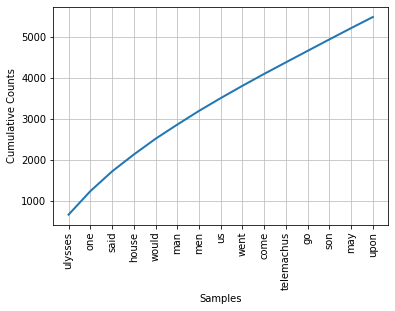

In [39]:
# calculate % of first 15 word tokens
total = 0
for i in fdist.most_common(15):
    total += i[1]
    
print("The first 15 word tokens constitute the {:.2%} of the text ({} words).".format(total / len(tokens), total))

# plot cumulative fdist
fdist.plot(15, cumulative=True);

The token "ulysses" constitutes 0.01 of text.

ulysses     one    said   house   would     man     men      us    went    come 
    655     573     483     413     385     347     335     313     301     291 


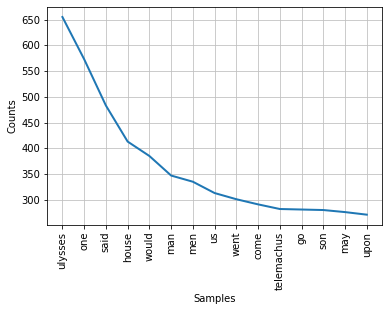

In [48]:
from nltk import FreqDist

# create a FreqDist
fdist = FreqDist(tokens)

print("The token \"{}\" constitutes {:.2f} of text.\n"
      .format(fdist.most_common()[0][0], fdist.most_common()[0][1] / len(tokens)))

# tabulate fdist
fdist.tabulate(10)

# plot fdist
fdist.plot(15);

In [76]:
# find hapaxes
print(f"There are {len(fdist.hapaxes())} words that appears only once in the text.\n\n\
The first 30 hapaxes are: {fdist.hapaxes()[:30]}")

There are 3273 words that appears only once in the text.

The first 30 hapaxes are: ['title', 'samuel', 'release', 'april', '1999', '1727', '2022', 'jim', 'tinsley', 'david', 'widger', 'rendered', 'contents', 'al', 'professore', 'cav', 'biagio', 'ingroia', 'prezioso', 'alleato', 'autore', 'riconoscente', 'supplement', 'entitled', 'unwieldy', 'epitomised', 'solve', 'periplus', 'via', 'arguments']


In [70]:
# find long freq words
long_common = [w for w in fdist if len(w) > 13]
print("There are {} words longer than 13 characters:\n\n{}".format(len(long_common) ,long_common))

There are 27 words longer than 13 characters:

['laestrygonians', 'interpretation', 'embellishments', 'accomplishments', 'contemptuously', 'redistribution', 'redistributing', 'electronically', 'scholasticised', 'simultaneously', 'rearrangements', 'singlehanded18', 'straightforwardly', 'inextinguishable', 'pyriphlegethon', 'disrespectfully', 'extraordinarily', 'notwithstanding', 'accomplishment', 'discouragement', 'circumnavigation', 'impossibilities', 'representations', 'nonproprietary', 'merchantability', 'unenforceability', 'identification']
